# 6.5 Unsupervised Machine Learning:
1. Import Libraries / Data / Path
2. Data Cleaning, Manipulations, and Reproecessing
3. Elbow Technique
4. Informed Decision About Number of Clusters
5. Run the K-means Algorithm
6. Attach Cluster Labels to the Dataframe
7. Create Visuals
8. Discuss Clusters
9. Calculate Descriptive Statistics for Clusters
10. How is This Useful
11. Export

# 1. Import libraries / data / path

In [97]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA

In [98]:
#create path
path = r'C:\Users\TypicalPancake\6.10 Gun Violence 12-2024'

In [99]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_merged_gv.csv'))

In [100]:
df.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1,-1
1,1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,...,20.0,Adult 18+,Male,Bernard Gillis,Unknown,Killed,Victim,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,...,25.0,Adult 18+,Male,Damien Bell,Unknown,"Injured, Unharmed, Arrested",Subject-Suspect,http://www.morningjournal.com/general-news/201...,56,13
3,3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,...,29.0,Adult 18+,Female,Stacie Philbrook,Unknown,Killed,Victim,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,...,18.0,Adult 18+,Female,Danielle Imani Jameison,Family,Injured,Victim,http://myfox8.com/2013/01/08/update-mother-sho...,62,27


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0.1                 239677 non-null  int64  
 1   Unnamed: 0                   239677 non-null  int64  
 2   incident_id                  239677 non-null  int64  
 3   date                         239677 non-null  object 
 4   state                        239677 non-null  object 
 5   city_or_county               239677 non-null  object 
 6   address                      239677 non-null  object 
 7   n_killed                     239677 non-null  int64  
 8   n_injured                    239677 non-null  int64  
 9   incident_url                 239677 non-null  object 
 10  source_url                   239677 non-null  object 
 11  incident_url_fields_missing  239677 non-null  bool   
 12  congressional_district       239677 non-null  int64  
 13 

# 2. data cleaning, manipulations, & reprocessing

In [103]:
# Drop unnecessary or duplicate columns
columns_to_drop = [
    'Unnamed: 0.1', 'Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
    'address', 'incident_url', 'source_url', 'gun_stolen', 'gun_type',
    'incident_characteristics', 'location_description', 'notes',
    'participant_age_group', 'participant_gender', 'participant_name',
    'participant_relationship', 'participant_status', 'participant_type', 'sources'
]
data_cleaned = df.drop(columns=columns_to_drop)

# Handle missing values by dropping rows with NaN in numerical columns
data_cleaned = data_cleaned.dropna()

# Select only numerical columns for k-means
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data_cleaned[numerical_columns]

# Standardize numerical variables
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_numerical), columns=numerical_columns)

# Display the standardized data
data_standardized.head()


,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,state_house_district,state_senate_district
0,-0.602555,4.588255,0.820609,0.441050,0.241387,-0.514064,-0.771240,-0.680214,-1.199978
1,1.065462,3.271193,4.367477,-0.256041,-1.475650,-0.514064,-0.771240,0.638084,1.167347
2,1.065462,3.271193,0.209079,0.560030,0.139562,0.541353,-0.396894,0.512532,-0.279352
3,6.069516,-0.679993,-0.157838,0.365804,-0.871830,-0.514064,-0.097418,0.177726,0.707034
4,2.733480,1.954131,-0.157838,-0.017278,0.236880,0.541353,-0.920978,0.638084,0.641275


# 3. elbow technique

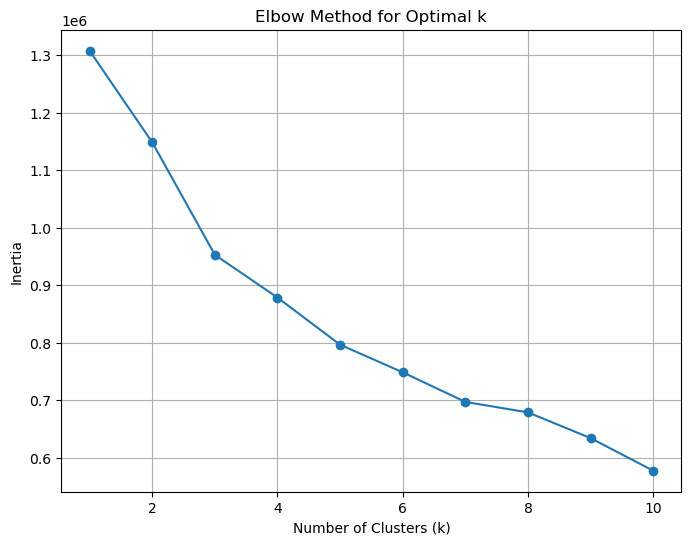

In [105]:
# Perform the elbow method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 4. informed decision of numbered clusters

I will proceed with k = 3 clusters for the k-means algorithm. This choice balances the trade-off between having distinct cluster groups and avoiding overfitting by adding too many clusters.

# 5. run the k-means algorithm / 6. attach cluster labels to the dataframe

In [109]:
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_standardized['Cluster'] = kmeans.fit_predict(data_standardized)

# Add cluster labels to the original standardized dataset
data_standardized['Cluster'] = data_standardized['Cluster'].astype('category')

# Display the resulting clustered dataset
data_standardized.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,state_house_district,state_senate_district,Cluster
0,-0.602555,4.588255,0.820609,0.441050,0.241387,-0.514064,-0.771240,-0.680214,-1.199978,2
1,1.065462,3.271193,4.367477,-0.256041,-1.475650,-0.514064,-0.771240,0.638084,1.167347,0
2,1.065462,3.271193,0.209079,0.560030,0.139562,0.541353,-0.396894,0.512532,-0.279352,2
3,6.069516,-0.679993,-0.157838,0.365804,-0.871830,-0.514064,-0.097418,0.177726,0.707034,0
4,2.733480,1.954131,-0.157838,-0.017278,0.236880,0.541353,-0.920978,0.638084,0.641275,0


# 7. create visuals

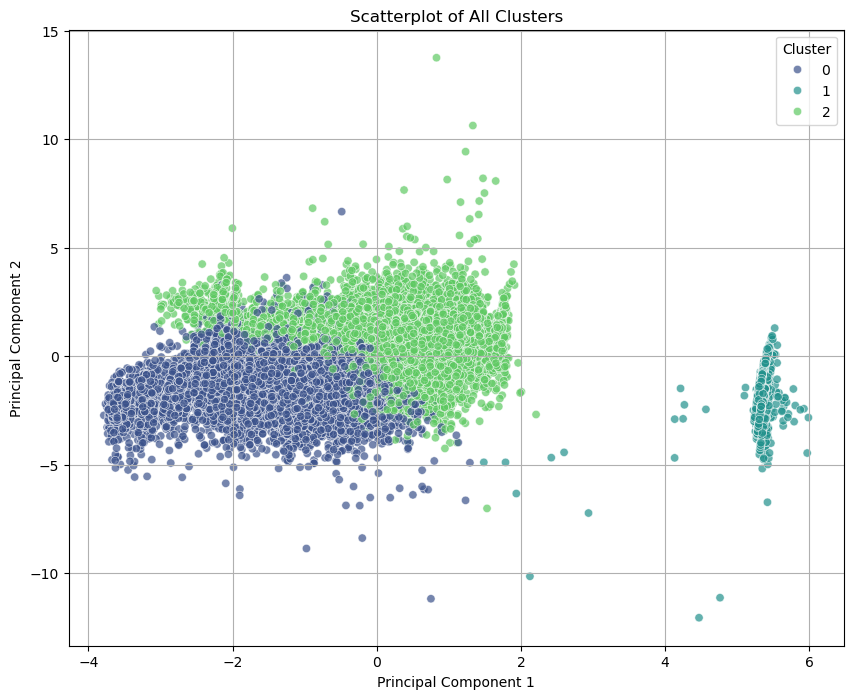

In [111]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(data_standardized.select_dtypes(include=['float64', 'int64'])), columns=['PC1', 'PC2'])
data_pca['Cluster'] = data_standardized['Cluster']

# Create a scatterplot of all clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=data_pca,
    alpha=0.7
)
plt.title('Scatterplot of All Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

C:\Users\TypicalPancake\AppData\Local\Temp\ipykernel_14552\71641392.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = clusters_age


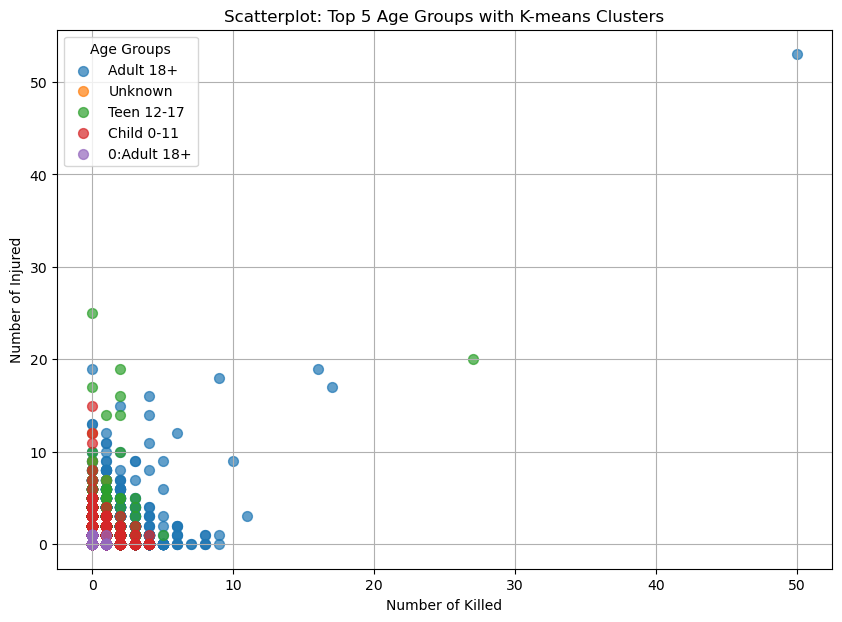

In [135]:
# Selecting the most frequent age groups in the dataset
top_age_groups = df['participant_age_group'].value_counts().head(5).index.tolist()

# Filtering the dataset to include only the top 5 age groups
data_filtered = df[df['participant_age_group'].isin(top_age_groups)]

# Selecting numerical features and filtering based on the top 5 age groups
data_age_group = data_filtered[['n_killed', 'n_injured']].dropna()

# Standardizing the data
scaler = StandardScaler()
data_age_scaled = scaler.fit_transform(data_age_group)

# Applying k-means clustering
kmeans_age = KMeans(n_clusters=3, random_state=42)
clusters_age = kmeans_age.fit_predict(data_age_scaled)

# Adding the cluster labels and age group back to the filtered dataset
data_filtered['Cluster'] = clusters_age

# Scatterplot for the top 5 age groups with clusters
plt.figure(figsize=(10, 7))
for age_group in top_age_groups:
    subset = data_filtered[data_filtered['participant_age_group'] == age_group]
    plt.scatter(subset['n_killed'], subset['n_injured'], label=age_group, s=50, alpha=0.7)

plt.title('Scatterplot: Top 5 Age Groups with K-means Clusters')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Injured')
plt.legend(title='Age Groups')
plt.grid(True)


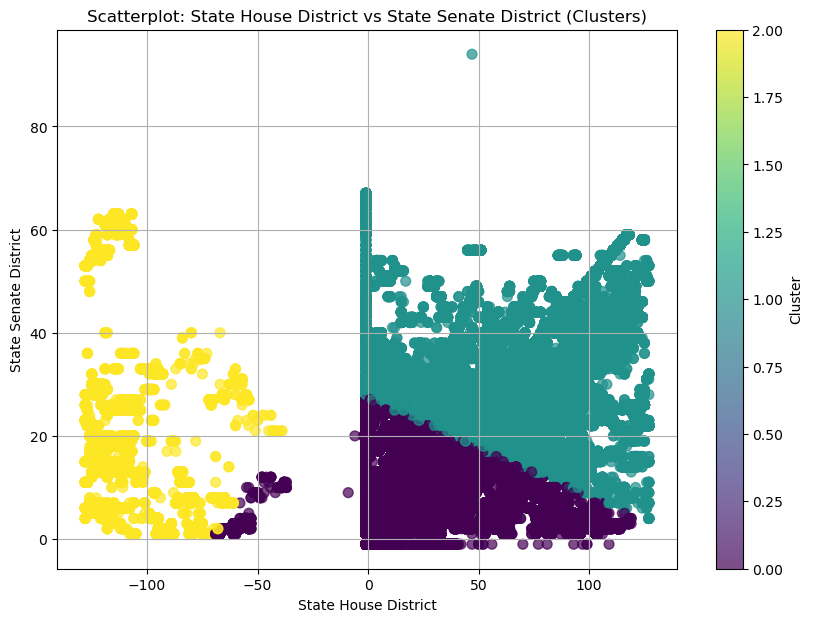

In [139]:
# Creating another scatterplot using different numerical features for clustering

# Selecting numerical features for the new scatter plot
numerical_features_new = ['state_house_district', 'state_senate_district']
data_cluster_new = df[numerical_features_new].dropna()

# Standardizing the new dataset
data_scaled_new = scaler.fit_transform(data_cluster_new)

# Applying k-means clustering to the new dataset
kmeans_new = KMeans(n_clusters=3, random_state=42)
clusters_new = kmeans_new.fit_predict(data_scaled_new)

# Adding the cluster labels back to the new dataset
data_cluster_new['Cluster'] = clusters_new

# Scatterplot: State House District vs State Senate District
plt.figure(figsize=(10, 7))
plt.scatter(
    data_cluster_new['state_house_district'],
    data_cluster_new['state_senate_district'],
    c=data_cluster_new['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.title('Scatterplot: State House District vs State Senate District (Clusters)')
plt.xlabel('State House District')
plt.ylabel('State Senate District')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# 8. discuss clusters
1. killed vs injured
   This scatter plot makes sense to identify as the incidents with a high number of killed individuals has a low number of injured. This will help analyze patterns of gun violence severity which then we can make plans to combat this.
2. Top age groups
   Clustering the top age groups affected shows a pattern of involvement incidents with younger people usually involved in higher violence scenarios. This would with targeted policymaking or awareness programs
3. State house vs Senate district
   Doesnt really make sense and does not reflect any meaningful patterns. 

# 9. calculate descriptive statistics for clusters

In [148]:
# Calculating descriptive statistics for each cluster
cluster_stats = data_standardized.groupby('Cluster').describe()

In [152]:
print(cluster_stats)

        n_killed                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
0        54249.0  0.129695  1.084556 -0.602555 -0.602555 -0.602555  1.065462   
1         6028.0  0.271300  1.453039 -0.602555 -0.602555 -0.602555  1.065462   
2        85039.0 -0.101968  0.884581 -0.602555 -0.602555 -0.602555  1.065462   

                   n_injured            ... state_senate_district            \
               max     count      mean  ...                   75%       max   
Cluster                                 ...                                   
0        44.433923   54249.0 -0.148886  ...              1.496142  5.047130   
1        82.798330    6028.0 -0.036975  ...             -1.199978  0.904311   
2        17.745639   85039.0  0.097600  ...             -0.213593  1.824937   

          Cluste                            

#discuss findings
1. The clusters reveal meaningful distinctions in the severity and frequency of gun violence incidents. This information can be leveraged for targeted interventions, policy decisions, and further exploration of the dataset. 

# 10. how is this useful

1. The clustering results provide a foundation for actionable insights in an analytics pipeline. They can be used for incident severity profiling, helping to categorize events and guide interventions. Predictive models can identify factors contributing to high-severity incidents, serving as early-warning systems for law enforcement. Resource allocation can be optimized by focusing on high-severity clusters, while broader community interventions target low-severity areas. Policymakers can leverage these insights to design targeted policies addressing systemic issues. Furthermore, the results enable the creation of dashboards for monitoring trends and visualizing the impact of interventions. Enhanced data collection and simulation of policy impacts can refine the analysis, contributing to effective strategies to mitigate gun violence. These steps support informed decision-making and resource prioritization for long-term solutions.

# 11. export to csv

In [165]:
#previewing
print(data_cleaned.head())
print(data_cleaned.info())
data_cleaned.shape

   n_killed  n_injured  incident_url_fields_missing  congressional_district  \
0         0          4                        False                      14   
1         1          3                        False                      43   
2         1          3                        False                       9   
3         4          0                        False                       6   
4         2          2                        False                       6   

   latitude  longitude  n_guns_involved  participant_age  \
0   40.3467   -79.8559             -1.0             20.0   
1   33.9090  -118.3330             -1.0             20.0   
2   41.4455   -82.1377              2.0             25.0   
3   39.6518  -104.8020             -1.0             29.0   
4   36.1140   -79.9569              2.0             18.0   

   state_house_district  state_senate_district  
0                    -1                     -1  
1                    62                     35  
2                

(145316, 10)

In [167]:
#exporting
data_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_gv_data.csv'), index=False)